In [246]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%run moudle/pre_process
%run moudle/segment



Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [247]:
src_data=open("data/applications.json")
corpus=src_data.read().replace('}{', '}|{').split('|')

num=-1

experiences=[]
for item in corpus[:num]:
    resume=resume_vec(item)
    if resume:
        experiences.append(resume)
experience_df=pd.DataFrame(experiences)
experience_df=experience_df.drop_duplicates([12])   
experience_df=experience_df.drop([6,7,8,9,10,11,12],axis=1)


In [248]:
len(experience_df)

956

In [249]:
# experience_df=experience_df.drop(1,axis=1)
ex_list=experience_df.loc[(experience_df[4]>40)][0].values
experiences=list(ex_list)
# for ex in experiences:
#     print ex
print len(experiences)

936


In [250]:

exp_seg=[]
for exp in experiences:
    exp_seg.append(text_segment(exp,20))
#     exp_seg.append(text_cut(exp))
    



In [252]:

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
vectorizer = TfidfVectorizer(min_df=0.01,max_df=0.03, decode_error='ignore')
X = vectorizer.fit_transform(exp_seg)
X=X.toarray()

print X.shape
print len(exp_seg)


(936, 189)
936


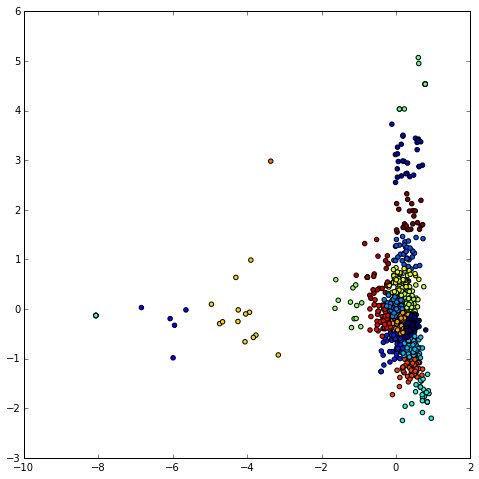

In [259]:
num_clusters=20
km = KMeans(n_clusters=num_clusters, random_state=3)

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
pca=PCA(n_components=2,whiten=True)
# pca=PCA(n_components=2)
pca_X=pca.fit_transform(X)

plt.figure(figsize=(8, 8))
pca_Y= km.fit_predict(pca_X)
scatter(pca_X[:, 0], pca_X[:, 1], c=pca_Y)

In [262]:
from sklearn.cluster import KMeans
# num_clusters=30
km = KMeans(n_clusters=num_clusters, random_state=3)
clustered = km.fit(X)

def get_key_words(matrix,i,min_df):
    key_words=""
    select=matrix[i]>min_df
    for idx in np.arange(length)[select]:
        key_words=key_words+word_list[idx]+" "
    print key_words
    
word_list=vectorizer.get_feature_names()
length=X.shape[1]  
for i in range(num_clusters):
    get_key_words(km.cluster_centers_,i,0.02)

会计 会计凭证 会议 凭证 分析员 北京分行 反馈 对账 小组 市场调研 指标 月度 柜员 永华 申报 税务 绩效 花旗银行 财务部 账务 费用 轮岗 部门经理 项目组 

中国工商银行 中国银行 估值 信贷 信贷部 分析员 办理 同事 咨询服务 外汇 学院 实地 总行 接待 推介 柜员 研究所 资本 跟进 运营部 银行业务 零售 
a股 capital research 事业部 全程 出具 协议 反馈 德勤 投融资 挂牌 收购 政策 晨会 洽谈 私募 股权 股票 资管 路演 辅助 银行业务 零售 
global group intern 估值 分析员 前台 北京分行 反馈 审批 客户资料 市场调研 市场部 广州 建议书 投融资 授信 收购 晨会 月度 梳理 模式 毕马威 汇丰银行 私募 管理部 统计 股权 评级 询证 轮岗 部门经理 
oo 专题研究 会议记录 估值 初步 埃森哲 审计报告 对标 建议书 投后 投融资 收集整理 有限责任 梳理 毕马威 申报 研究部 股票 行研 评级 资本 项目组 
a股 中信 事业部 会计凭证 估值 保险 内控 函证 初步 审计员 审计师 审计报告 对公 年度 年报 投后 搜集整理 收集整理 普华永道 测试 研报 统计 询证 账务 资本 量化 锻炼 问卷 
global management oo 事宜 会计凭证 估值 出具 协议 咨询服务 安盛 对标 年报 归档 微信 投行部 授信 收购 期货 标的 梳理 模式 汇报 深度 熟练 私募 策划 证券化 询证 说明书 账户 贷后 辅助 部门经理 预测 
事宜 信用卡 反馈 定期 实地 审计员 对接 市场调研 市场部 年度 广州 开户 德勤 挂牌 收集整理 汇报 测试 私募 绩效 花旗银行 询证 财务部 贷后 跟进 辅导 银行业务 零售 
bloomberg sap 中国工商银行 事业部 信用 信用卡 公开 凭证 前台 办理 同事 咨询服务 埃森哲 安盛 审批 审计师 审计报告 建议书 指标 数据处理 月度 期货 校对 每日 汇报 熟练 现场 申报 税务 立项 组合 翻译 说明书 费用 起草 软件 运营部 项目部 预测 
中国工商银行 交易员 会计 会议纪要 保险 信用 信用卡 内控 凭证 原始凭证 咨询服务 外汇 审批 审计员 对接 市场部 开户 总行 接待 有限责任 柜员 核对 毕

In [265]:
index=(km.labels_==0).nonzero()
for idx in index[0][:5]:
    print experiences[idx]
    print "-"*82

上海新海申消防科技有限公司总裁助理总经办各部门工作快速轮岗；协助安排工作日程；有关文件的起草、修改、审核，重要文件档案管理；协助处理重要出访、接待工作；配合与公司各部门沟通；传达并跟踪工作任务并及时反馈落实进度情况；随行商务谈判，并负责各项汇报、联络工作；负责开拓公司互联网业务；等等。上海上电阀门有限公司总经理助理销售部业务档案管理，业务相关资料和文件的收集、整编及汇总；传达并跟踪工作任务并及时反馈落实进度情况；配合总经理处理出访及接待工作；等等。上海城业管桩构件有限公司实习生财务部协助相关资料整理及归类；打印发票及开具收据；协助录入并编制财务资料；协助相关的清算及审核。
----------------------------------------------------------------------------------
安永华明会计师事务所（特殊普通合伙）审计部实习生长春奥普光电技术股份有限公司财务部实习生佩尔英语成人部助教
----------------------------------------------------------------------------------
中国恒天经纬纺织机械股份有限公司财务助理财务部辅助财务主管进行日常财务核算，凭证、账务处理工作中国恒天经纬纺织机械股份有限公司业务助理财务部填写业务单据，翻译海外业务文件，联系外贸公司，辅助业务主管商谈业务山西省晋中市国税局税源管理助理财务部学习使用金税三期工程报税、缴税操作系统；实际进入所管辖企业检查账簿设置，账簿、凭证内容，保证税源的真实、合法性
----------------------------------------------------------------------------------
阳光渝融信用保证保险股份有限公司筹备组财务企划财务部参与阳光渝融信用保证保险股份有限公司筹备
1.负责筹备期相关财务制度的资料收集和编制；
2.负责财务系统：Oracle、费用预算控制系统、资金系统基础数据的收集。
3.负责总账、费用核算细则的编写及报表取数规则的编写;
4.负责筹备期资本金账户开立、验资账户的开立；
4.负责沟通核算、系统、资金业务纳入集团财务共享服务中心事项；阳光保险集团股份有限公司复核记账岗企划财务部1.根据内外监管要求、会计制度及公

In [264]:
for i in range(num_clusters): 
    index=(km.labels_==i).nonzero()
    print len (index[0])

26
613
16
26
12
9
23
15
12
17
28
17
23
4
22
15
17
9
19
13


In [267]:
for i in vectorizer.get_feature_names():
    print i

app
a股
bloomberg
capital
global
group
intern
investment
management
matlab
oo
research
sap
vba
专员
专题研究
业务经理
业务部门
中信
中国农业银行
中国工商银行
中国建设银行
中国银行
事业部
事宜
交易员
亿元
会计
会计凭证
会议
会议纪要
会议记录
估值
保险
信用
信用卡
信贷
信贷部
修改
全程
公开
兼职
内控
准备
凭证
出具
函证
分析员
初步
前台
办理
北京分行
北京市
医疗
协议
原始凭证
反馈
同事
周报
咨询师
咨询服务
埃森哲
外汇
学院
安盛
宏观
定期
实地
审批
审计员
审计师
审计报告
客户关系
客户资料
对公
对冲
对接
对标
对账
小组
工程师
市场调研
市场部
年度
年报
广州
建投
建议书
开户
归档
微信
德勤
总行
房地产
投后
投融资
投行部
报送
挂牌
指标
授信
接待
推介
搜集整理
支持
收益
收购
收集整理
政策
数据处理
文案
新加坡
晨会
普华永道
月度
有限责任
期货
构建
柜员
标的
校园
校对
核对
核查
案例
梳理
模式
每日
毕马威
永华
汇丰银行
汇总
汇报
洽谈
测试
深度
熟练
现场
申报
盘点
研报
研究所
研究部
私募
科技
税务
立项
策划
管理部
组合
统计
绩效
美国
翻译
股权
股票
花旗银行
行研
证券化
评级
询证
说明书
调查报告
财务部
账务
账户
贷后
费用
资本
资管
起草
跟进
路演
轮岗
软件
辅助
辅导
运营部
部门经理
量化
银行业务
锻炼
问卷
零售
项目组
项目部
预测
风险管理
高管


In [268]:
print len(vectorizer.get_feature_names())

189
